<a href="https://colab.research.google.com/github/AkkiAT/AT/blob/main/GoldPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [21]:
gold_data.shape

(2290, 6)

In [22]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [23]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [24]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
import pandas as pd

# Convert non-numeric data to numeric values
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Calculate the correlation matrix
correlation = gold_data.corr()

In [30]:
import pandas as pd

# Drop rows with non-numeric data
gold_data = gold_data.dropna(axis=0, how='any')

# Calculate the correlation matrix
correlation = gold_data.corr()

In [31]:
correlation = gold_data.corr()

<Axes: >

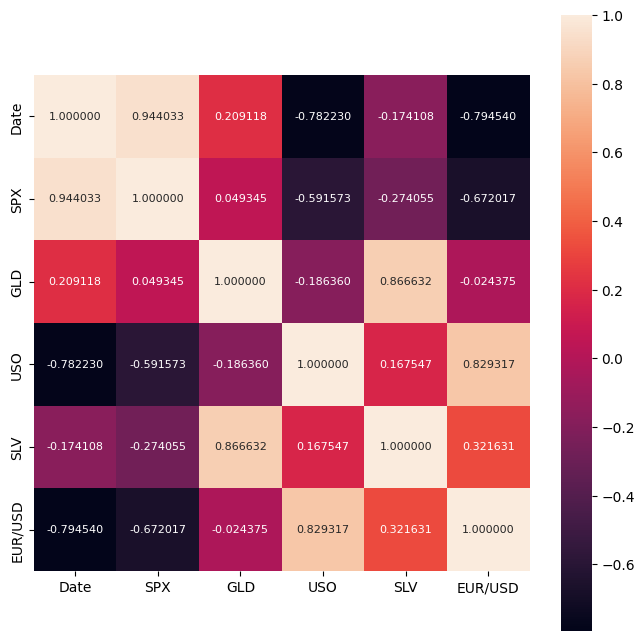

In [32]:
plt.figure(figsize = (8, 8))
sns.heatmap(gold_data.corr(), cbar=True, annot=True, square=True, fmt='1f', annot_kws={'size': 8})


In [33]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-34-dbea7e84cd97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

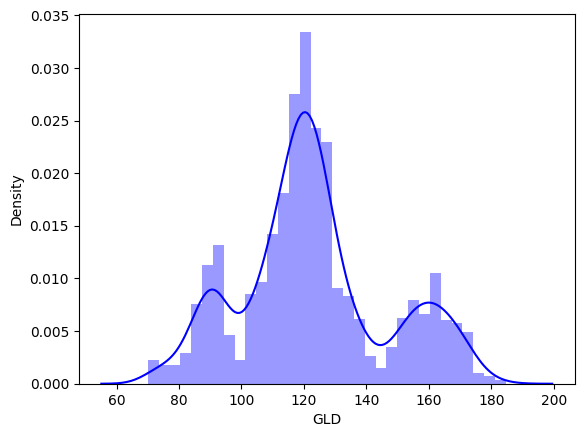

In [34]:
sns.distplot(gold_data['GLD'], color='blue')

In [35]:
X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [36]:
print(X)

           Date          SPX        USO      SLV   EUR/USD
0    2008-01-02  1447.160034  78.470001  15.1800  1.471692
1    2008-01-03  1447.160034  78.370003  15.2850  1.474491
2    2008-01-04  1411.630005  77.309998  15.1670  1.475492
3    2008-01-07  1416.180054  75.500000  15.0530  1.468299
4    2008-01-08  1390.189941  76.059998  15.5900  1.557099
...         ...          ...        ...      ...       ...
2285 2018-05-08  2671.919922  14.060000  15.5100  1.186789
2286 2018-05-09  2697.790039  14.370000  15.5300  1.184722
2287 2018-05-10  2723.070068  14.410000  15.7400  1.191753
2288 2018-05-14  2730.129883  14.380000  15.5600  1.193118
2289 2018-05-16  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 5 columns]


In [37]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [40]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100)

In [47]:
Y_train = Y_train.astype('datetime64[D]')

In [50]:
X_train = X_train.drop(columns=["Date"])

In [53]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [58]:
# Drop the "Date" column from the test data, as it was not present in the training data.
X_test = X_test.drop(columns=["Date"])

# Fit the RandomForestRegressor model using the updated training data.
regressor.fit(X_train, Y_train)

# Predict using the updated test data.
test_data_prediction = regressor.predict(X_test)

In [59]:
test_data_prediction = regressor.predict(X_test)

In [60]:
print(test_data_prediction)

[14510016.  7071840.  9945504. 10965888. 10395648. 13338432. 12921120.
 10869984. 10105344. 10835424. 10050912. 14848704. 12227328. 14455584.
  9916128. 10093248. 11959488. 14647392. 13768704. 13817088. 13367808.
 10776672. 15162336. 13569984. 10772352.  8052480.  6639840. 10425888.
 10252224. 14417568.  7566048. 10803456.  7821792. 10101024. 10412064.
 11765952.  9952416.  9896256. 12780288.  9255168.  9035712.  7495200.
 10889856. 10140768. 13092192. 10275552.  9322560.  9271584.  8034336.
 10952064.  6418656.  9763200. 10456128.  9576576. 10222848. 10416384.
 13781664. 14490144. 12614400.  7423488.  8123328.  7477056.  7781184.
 10235808. 10889856. 10985760. 14668128. 10503648. 10091520.  8452512.
 14489280. 12303360. 11366784. 10428480. 10375776. 10309248.  9844416.
 10142496.  9272448. 10989216.  9808992.  9223200. 10024992. 10281600.
  7634304.  7574688. 12579840. 10958976.  9756288.  9478944.  9322560.
  6622560. 14618880.  9810720. 10484640. 11032416. 13357440.  7871904.
 11674

In [63]:
!pip install scikit-learn

In [64]:
from sklearn import metrics

In [65]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  -218718360030.08643


In [66]:
Y_test = list(Y_test)

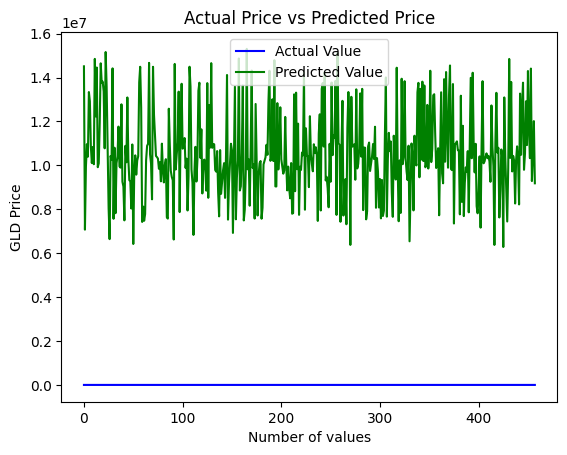

In [67]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()